# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json  
import tweepy
import warnings
import re
warnings.filterwarnings("ignore")

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [40]:
URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
req = requests.get(URL)
with open('image_predictions.tsv', 'wb')as file:
    file.write(req.content)

In [3]:
df_image = pd.read_csv('image_predictions.tsv',delimiter='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

### credintionals


In [4]:
API_key = '#'
API_secret = '#'
Bearer_Token = '#'
access_token = '#'
access_secret = '#'

### Authentcation

In [5]:
Auth = tweepy.OAuthHandler(API_key,API_secret)
Auth.set_access_token(access_token, access_secret)

app = tweepy.API(Auth, wait_on_rate_limit=True)


### data gathering 

In [35]:
df_tweets = pd.DataFrame(columns = ['tweet_id','favorite','retweet'])
notFoundTweets=[]
for tweetID in df_twitter.tweet_id:
    try:
        tweet = app.get_status(int(tweetID))._json 
        df_tweets = df_tweets.append({
            'tweet_id': tweetID,
            'favorite': tweet['favorite_count'],
            'retweet' : tweet['retweet_count'],
        },ignore_index = True)
    except Exception as e: 
        notFoundTweets.append(str(tweetID) +'   '+ str(e))
df_tweets.to_csv('tweets_json.csv',index=False)
np.savetxt('tweet_json.txt',df_tweets.values,fmt="%s")

Rate limit reached. Sleeping for: 197
Rate limit reached. Sleeping for: 434


In [4]:
df_tweets = pd.read_csv('tweets_json.csv')
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tweet_id  2327 non-null   int64
 1   favorite  2327 non-null   int64
 2   retweet   2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual assessment

In [5]:
df_twitter.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None
219,850145622816686080,NaN,NaN,2017-04-07 00:38:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Riley. He's making new friends. Jubila...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850145622...,11,10,Riley,None,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
70,879008229531029506,NaN,NaN,2017-06-25 16:07:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beau. That is Beau's balloon. He takes...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879008229...,13,10,Beau,None,None,None,None
389,826476773533745153,NaN,NaN,2017-01-31 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pilot. He has mastered the synchronize...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826476773...,12,10,Pilot,doggo,None,None,None
430,821044531881721856,NaN,NaN,2017-01-16 17:20:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flash. He went way too hard celebratin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821044531...,12,10,Flash,None,None,None,None
331,832998151111966721,NaN,NaN,2017-02-18 17:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rhino. He arrived at a shelter with an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832998151...,13,10,Rhino,doggo,None,None,None
2028,671866342182637568,NaN,NaN,2015-12-02 01:39:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dylan. He can use a fork but clearly can'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671866342...,10,10,Dylan,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
1191,717841801130979328,NaN,NaN,2016-04-06 22:29:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Barclay. His father was a banana. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717841801...,11,10,Barclay,None,None,None,None


In [6]:
df_image.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
586,679047485189439488,https://pbs.twimg.com/media/CWx2FaLWcAEQ3vh.jpg,1,panpipe,0.962572,False,bannister,0.025248,False,golden_retriever,0.002930,True
1729,820749716845686786,https://pbs.twimg.com/media/C2PjgjQXcAAc4Uu.jpg,2,golden_retriever,0.838012,True,Pekinese,0.056733,True,Labrador_retriever,0.023944,True
707,685169283572338688,https://pbs.twimg.com/media/CYI10WhWsAAjzii.jpg,1,Bernese_mountain_dog,0.975096,True,Appenzeller,0.014578,True,EntleBucher,0.005943,True
1171,736365877722001409,https://pbs.twimg.com/media/CjgYyuvWkAAHU8g.jpg,3,cup,0.473555,False,toy_poodle,0.082606,True,consomme,0.048298,False
981,707377100785885184,https://pbs.twimg.com/media/CdEbt0NXIAQH3Aa.jpg,1,golden_retriever,0.637225,True,bloodhound,0.094542,True,cocker_spaniel,0.069797,True
760,688828561667567616,https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg,1,Cardigan,0.614231,True,skunk,0.139392,False,toilet_tissue,0.031158,False
1546,792394556390137856,https://pbs.twimg.com/media/Cv8moW9W8AIHOxR.jpg,2,cocker_spaniel,0.746387,True,Irish_setter,0.091615,True,miniature_poodle,0.061078,True
82,667491009379606528,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False
1849,839990271299457024,https://pbs.twimg.com/media/C6g-sX-VsAAHfJ9.jpg,2,Staffordshire_bullterrier,0.604938,True,American_Staffordshire_terrier,0.311540,True,Boston_bull,0.037159,True
1880,846874817362120707,https://pbs.twimg.com/media/C8C0JYHW0AAy-7u.jpg,2,Shetland_sheepdog,0.450539,True,papillon,0.187928,True,collie,0.140068,True


In [7]:
df_tweets.sample(15)

,tweet_id,favorite,retweet
291,835685285446955009,0,7502
1085,733109485275860992,49728,15638
2000,671855973984772097,799,376
1309,705102439679201280,1984,478
1803,676191832485810177,2070,929
188,854482394044301312,26817,6061
201,852189679701164033,10651,1437
1261,708149363256774660,4014,1422
2214,667902449697558528,765,337
582,798644042770751489,0,1749


### Programmatic assessment

In [8]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
print(" Number of duplicated tweets are :    "+str(sum(df_twitter.tweet_id.duplicated())))
print(" Number of tweets with same time stamp :    "+str(df_twitter.timestamp.duplicated().sum()))
print(" Number of tweets that doesn't contains text :   "+str(df_twitter.text.isnull().sum()))
print(" Number of tweets that thier URLs are expanded :    "+str(df_twitter.expanded_urls.isnull().sum()))
print(" Number of tweets "+str(df_twitter.shape[0]))
print(" There are "+str(df_twitter.name.value_counts()[0])+" dogs without names" )
df_twitter.describe()

 Number of duplicated tweets are :    0
 Number of tweets with same time stamp :    0
 Number of tweets that doesn't contains text :   0
 Number of tweets that thier URLs are expanded :    59
 Number of tweets 2356
 There are 745 dogs without names


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
print(" Number of duplicated Dog pictures:          " + str(df_image.jpg_url.duplicated().sum()))
print(" The accurcy of the first predection :  {:8.2f}" .format(df_image.p1_dog.mean()))
print(" The accurcy of the second predection:  {:8.2f}" .format(df_image.p2_dog.mean()))
print(" The accurcy of the third predection :  {:8.2f}" .format(df_image.p3_dog.mean()))
df_image.describe()

 Number of duplicated Dog pictures:          66
 The accurcy of the first predection :      0.74
 The accurcy of the second predection:      0.75
 The accurcy of the third predection :      0.72


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [12]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tweet_id  2327 non-null   int64
 1   favorite  2327 non-null   int64
 2   retweet   2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [13]:
print(" There are " + str( df_tweets.tweet_id.duplicated().sum()) + " duplicated recoreds")

df_tweets.describe()

 There are 0 duplicated recoreds


,tweet_id,favorite,retweet
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7103.030941,2488.024065
std,6.820795e+16,11038.615985,4213.380742
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1230.000000,499.000000
50%,7.178418e+17,3066.000000,1156.000000
75%,7.986547e+17,8666.500000,2881.500000
max,8.924206e+17,145663.000000,71228.000000


### Quality issues
1.  There are 59 missing extended_URLs.
2.	Names must be correct some are None and others are not true names such as 'a' and 'an'.
3.	The source column in the df_twitter contain useless information, so it needs to be clear.
4.	Change the column timestamp type to Date Time.
5.	There are 66 duplicated jpg_URLs.
6.	Columns that is unnecessary for the analysis need to be dropped.
7.	Data of the retweets will be dropped since they are not the original data.
8.	Change the data type of rating_numerator and rating_denominator to float instead of int.
9.	putting the rating in a single column.
10.	Combining the predictions of dog type.


### Tidiness issues
1. In the df_twitter there are four columns of dog stages, that can be represented in a single column.
2. All three datasets need to be merged.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [14]:
# Make copies of original pieces of data
df_twitter_clean = df_twitter.copy()
df_image_clean = df_image.copy()
df_tweets_clean = df_tweets.copy()

## Quality

### Issue #1:

#### Define: There are 59 missing extended_URLs

#### Code

In [15]:
for index, column in df_twitter_clean.iterrows():
    df_twitter_clean.loc[index, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(index)

#### Test

In [16]:
df_twitter_clean.expanded_urls.isnull().sum()

0

### Issue #2:

#### Define: Names must be correct some are None and others are not true names such as 'a' and 'an'.

#### Code

In [17]:
NotNames = []
for x, value in df_twitter_clean.name.items():
    if len(value) < 2:
        NotNames.append(value)    
NotNames = set(NotNames)
df_twitter_clean.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [18]:
df_twitter_clean.name.replace(NotNames,'None',inplace=True)

In [19]:
df_twitter_clean.name.replace('None',np.nan,inplace=True)
df_twitter_clean.name.value_counts()

Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
              ..
Dex            1
Ace            1
Tayzie         1
Grizzie        1
Christoper     1
Name: name, Length: 954, dtype: int64

#### Test

In [20]:
print(" The number of null values after connverting cleaning the names: "+str(df_twitter_clean.name.isnull().sum()))
df_twitter_clean.name.value_counts()

 The number of null values after connverting cleaning the names: 801


Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
              ..
Dex            1
Ace            1
Tayzie         1
Grizzie        1
Christoper     1
Name: name, Length: 954, dtype: int64

### Issue #3:

#### Define:    The source column in the df_twitter contain useless information so it needs to be clear.

#### Code

In [21]:
df_twitter_clean['source'] = df_twitter_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [22]:
df_twitter_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #4:

#### Define:   Change the column timestamp type to DateTime.
#### Code

In [23]:
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean['timestamp'])

#### Test

In [24]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2356 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #5:

#### Define:   There are 66 duplicated jpg_URLs.
#### Code

In [25]:
NOduplicated_jpg = df_image_clean.jpg_url.duplicated().sum()
print(NOduplicated_jpg)
df_image_clean.drop_duplicates(subset = ['jpg_url'],inplace=True)

66


#### Test

In [26]:
df_image_clean.jpg_url.duplicated().sum()

0

### Issue #6:

#### Define:  Columns that is unnecessary for the analysis need to be dropped.
#### Code

In [27]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2356 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [28]:
print(' There are  '+ str(df_twitter_clean.retweeted_status_timestamp.count()) +" retweets in the dataset")
UnNecessaryColumns = ['in_reply_to_status_id','in_reply_to_user_id',
'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
df_twitter_clean.drop(UnNecessaryColumns,axis=1,inplace=True)

 There are  181 retweets in the dataset


#### Test

In [29]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2356 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                1555 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #7:

#### Define:  Data of the retweets will be droped since they are not the original data. 
#### Code

In [30]:
# replacing all retweets with null in text so it can be easy to drop them. 
df_twitter_clean.mask(df_twitter_clean.text.str.contains(pat='^RT @'),other=np.nan,inplace=True)

In [31]:
df_twitter_clean.text.isnull().sum()

181

In [32]:
df_twitter_clean.dropna(inplace=True,thresh=2)

#### Test

In [33]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   float64            
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2175 non-null   object             
 5   rating_numerator    2175 non-null   float64            
 6   rating_denominator  2175 non-null   float64            
 7   name                1439 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

In [34]:
df_twitter_clean.text.isnull().sum()

0

### Issue #8:

#### Define: Chage the data type of rating_numerator and rating_denominator to float instead of int.   

#### Code

In [35]:
df_twitter_clean.rating_denominator.astype('int64')
df_twitter_clean.rating_numerator.astype('int64')

0       13
1       13
2       12
3       13
4       12
        ..
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2175, dtype: int64

#### Test

In [36]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   float64            
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2175 non-null   object             
 5   rating_numerator    2175 non-null   float64            
 6   rating_denominator  2175 non-null   float64            
 7   name                1439 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

### Issue #9:

#### Define:    putting the rating in a single column.

#### Code

In [37]:
df_twitter_clean['rating'] = (df_twitter_clean['rating_numerator'] / df_twitter_clean['rating_denominator'])*10

#### Test

In [38]:
df_twitter_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
611,7.971660e+17,2016-11-11 19:55:50+00:00,Twitter for iPhone,@JODYHiGHROLLER it may be an 11/10 but what do...,https://twitter.com/dog_rates/status/611,11.0,10.0,NaN,None,None,None,None,11.0
1717,6.801913e+17,2015-12-25 01:00:07+00:00,Twitter for iPhone,Here's a sleepy Christmas pupper 11/10 https:/...,https://twitter.com/dog_rates/status/1717,11.0,10.0,NaN,None,None,pupper,None,11.0
630,7.943323e+17,2016-11-04 00:15:59+00:00,Twitter for iPhone,This is Nimbus (like the cloud). He just bough...,https://twitter.com/dog_rates/status/630,12.0,10.0,Nimbus,None,None,None,None,12.0
2312,6.667769e+17,2015-11-18 00:36:17+00:00,Twitter for iPhone,This is Josep. He is a Rye Manganese mix. Can ...,https://twitter.com/dog_rates/status/2312,5.0,10.0,Josep,None,None,None,None,5.0
662,7.909874e+17,2016-10-25 18:44:32+00:00,Twitter for iPhone,This is Misty. She has a cowboy hat on her nos...,https://twitter.com/dog_rates/status/662,12.0,10.0,Misty,None,None,None,None,12.0
1147,7.269351e+17,2016-05-02 00:43:25+00:00,Twitter for iPhone,This is Sprout. He's just precious af. 12/10 I...,https://twitter.com/dog_rates/status/1147,12.0,10.0,Sprout,None,None,None,None,12.0
125,8.686225e+17,2017-05-28 00:18:35+00:00,Twitter for iPhone,Here's a h*ckin peaceful boy. Unbothered by th...,https://twitter.com/dog_rates/status/125,13.0,10.0,NaN,None,None,None,None,13.0
624,7.954643e+17,2016-11-07 03:14:10+00:00,Twitter for iPhone,Elder doggo does a splash. Both 13/10 incredib...,https://twitter.com/dog_rates/status/624,13.0,10.0,NaN,doggo,None,None,None,13.0
1346,7.044803e+17,2016-03-01 01:36:14+00:00,Twitter for iPhone,Meet Lucia. She's a Cumulonimbus Floofmallow. ...,https://twitter.com/dog_rates/status/1346,11.0,10.0,Lucia,None,None,None,None,11.0
292,8.380839e+17,2017-03-04 17:49:08+00:00,Twitter for iPhone,This is Daisy. She's puppears to be rare as al...,https://twitter.com/dog_rates/status/292,13.0,10.0,Daisy,None,None,None,None,13.0


### Issue #10:

#### Define:   	Combining the predictions of dog type.

#### Code

In [39]:
pred = []
conf = []
for index, x in df_image_clean.iterrows():
    if x['p1_dog'] == True:
        pred.append(x['p1'])
        conf.append(x['p1_conf'])
    elif x['p2_dog'] == True:
        pred.append(x['p2'])
        conf.append(x['p2_conf'])
    elif x['p3_dog'] == True:
        pred.append(x['p3'])
        conf.append(x['p3_conf'])
    else:
        pred.append(np.nan)
        conf.append(np.nan)
df_image_clean['dog_Type'] = pred

#### Test

In [40]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   int64  
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
 12  dog_Type  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 178.5+ KB


 since we do not need the combined columns I will drop them.

In [41]:
df_image_clean.drop(columns=['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],inplace=True)
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2009 non-null   int64 
 1   jpg_url   2009 non-null   object
 2   dog_Type  1691 non-null   object
dtypes: int64(1), object(2)
memory usage: 62.8+ KB


## Tidiness

### Issue #11:

#### Define:  In the df_twitter there are four columns of dog stages, that can be represented in a single column. 
#### Code

In [42]:
Columns = ['tweet_id','timestamp','source','text','expanded_urls','rating','name']
mergedColumns = ['doggo','floofer','pupper','puppo']                                                                
df_twitter_clean = pd.melt(df_twitter_clean, id_vars=Columns, value_vars = mergedColumns ,value_name='dog_stage',ignore_index=False)
df_twitter_clean.drop('variable',axis=1,inplace=True)
df_twitter_clean = df_twitter_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

#### Test

In [43]:
df_twitter_clean.dog_stage.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_stage, dtype: int64

In [44]:
df_twitter_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage
2151,6.696821e+17,2015-11-26 01:00:28+00:00,Twitter for iPhone,Meet Louie. He just pounded that bottle of win...,https://twitter.com/dog_rates/status/2151,9.0,Louie,None
1936,6.739569e+17,2015-12-07 20:07:04+00:00,Twitter for iPhone,This is one esteemed pupper. Just graduated co...,https://twitter.com/dog_rates/status/1936,10.0,one,pupper
2036,6.717299e+17,2015-12-01 16:37:44+00:00,Twitter for iPhone,I'm just going to leave this one here as well....,https://twitter.com/dog_rates/status/2036,13.0,NaN,None
1719,6.801611e+17,2015-12-24 23:00:17+00:00,Twitter for iPhone,Meet Goliath. He's an example of irony. Head i...,https://twitter.com/dog_rates/status/1719,12.0,Goliath,None
1365,7.026849e+17,2016-02-25 02:42:00+00:00,Twitter for iPhone,This is Lucy. She's sick of these bullshit gen...,https://twitter.com/dog_rates/status/1365,11.0,Lucy,None


In [45]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2276 to 947
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2175 non-null   float64            
 1   timestamp      2175 non-null   datetime64[ns, UTC]
 2   source         2175 non-null   object             
 3   text           2175 non-null   object             
 4   expanded_urls  2175 non-null   object             
 5   rating         2175 non-null   float64            
 6   name           1439 non-null   object             
 7   dog_stage      2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), object(5)
memory usage: 152.9+ KB


### Issue #12:

#### Define: All three datasets need to be merged.
#### Code

In [46]:
df = df_image_clean.merge(df_twitter_clean,how='inner',on='tweet_id')
df = df.merge(df_tweets_clean,how='inner',on='tweet_id')
df.shape

(1296, 12)

#### Test

In [47]:
df.sample(5)

,tweet_id,jpg_url,dog_Type,timestamp,source,text,expanded_urls,rating,name,dog_stage,favorite,retweet
460,684188786104872960,https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,kelpie,2016-01-05 01:44:52+00:00,Twitter for iPhone,"""Yo Boomer I'm taking a selfie, grab your stic...",https://twitter.com/dog_rates/status/1638,10.0,NaN,None,3253,1063
951,773704687002451968,https://pbs.twimg.com/media/CrzATQqWAAEHq2t.jpg,silky_terrier,2016-09-08 02:09:06+00:00,Twitter for iPhone,This is Loki. He knows he's adorable. One ear ...,https://twitter.com/dog_rates/status/791,12.0,Loki,None,6277,1507
356,675878199931371520,https://pbs.twimg.com/media/CWEzo19WoAEiOCj.jpg,Cardigan,2015-12-13 03:21:34+00:00,Twitter for iPhone,"Ok, I'll admit this is a pretty adorable bunny...",https://twitter.com/dog_rates/status/1841,11.0,NaN,None,3802,1247
474,685169283572338688,https://pbs.twimg.com/media/CYI10WhWsAAjzii.jpg,Bernese_mountain_dog,2016-01-07 18:41:01+00:00,Twitter for iPhone,Meet Gerbald. He just found out he's adopted. ...,https://twitter.com/dog_rates/status/1617,11.0,Gerbald,pupper,3814,1287
432,680913438424612864,https://pbs.twimg.com/media/CXMXKKHUMAA1QN3.jpg,Pomeranian,2015-12-27 00:49:49+00:00,Twitter for iPhone,Meet Griswold. He's dapper as hell. Already pu...,https://twitter.com/dog_rates/status/1703,11.0,Griswold,None,2233,569


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [48]:
df.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [49]:
final_df = pd.read_csv('twitter_archive_master.csv')
final_df.timestamp = pd.to_datetime(final_df.timestamp)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       1296 non-null   int64              
 1   jpg_url        1296 non-null   object             
 2   dog_Type       1096 non-null   object             
 3   timestamp      1296 non-null   datetime64[ns, UTC]
 4   source         1296 non-null   object             
 5   text           1296 non-null   object             
 6   expanded_urls  1296 non-null   object             
 7   rating         1296 non-null   float64            
 8   name           888 non-null    object             
 9   dog_stage      1296 non-null   object             
 10  favorite       1296 non-null   int64              
 11  retweet        1296 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(7)
memory usage: 121.6+ KB


In [50]:
final_df.head()

,tweet_id,jpg_url,dog_Type,timestamp,source,text,expanded_urls,rating,name,dog_stage,favorite,retweet
0,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/2354,7.0,NaN,None,112,39
1,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/2352,6.0,NaN,None,247,116
2,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,NaN,2015-11-16 00:35:11+00:00,Twitter for iPhone,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/2349,2.0,an,None,1034,710
3,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,2015-11-16 00:55:59+00:00,Twitter for iPhone,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/2347,9.0,NaN,None,252,113
4,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,2015-11-16 01:01:59+00:00,Twitter for iPhone,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/2346,8.0,the,None,99,47


### Insights:
1.  The more the tweet get retweeted the more the number of favorites it gets.

2.  The most common stage of dogs are Pupper, then floofer, followed by doggo, and the least common is puppo

3.  There are only 14 out of 108 Dog Breed with rating above 5/10, and miniature_schnauzer is in the top with 9.6/10

### Visualization

Text(0.5, 1.0, 'Retweets and favorites Relation Scatter plot')

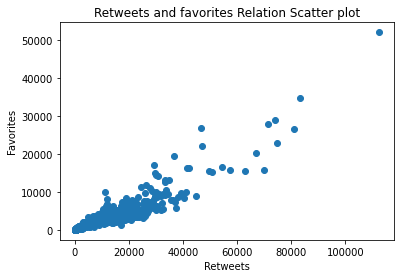

In [60]:
plt.scatter(final_df['favorite'], final_df['retweet'])
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.title('Retweets and favorites Relation Scatter plot')

The more the tweet get retweeted the more the number of favorites it gets.

Text(0.5, 1.0, 'Dog stage')

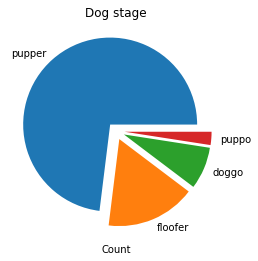

In [129]:
plt.pie(labels=final_df.dog_stage.unique()[1:],x=final_df.dog_stage.value_counts()[1:],explode =  (0.1, 0.1, 0.1, 0.1))
plt.xlabel('Count')
plt.title('Dog stage')

The most common stage of dogs are Pupper, then floofer, followed by doggo, and the least common is puppo

Text(0.5, 1.0, 'A Bar chart of top 15 predicted dog breed in rating ')

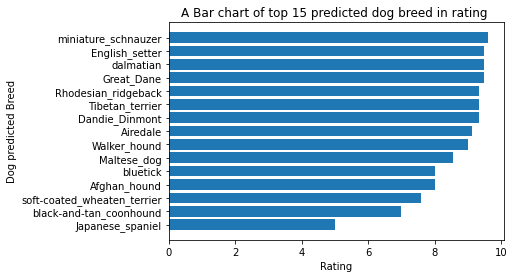

In [123]:
plt.barh(final_df.groupby(final_df.dog_Type).rating.mean().sort_values()[:15].index[:15],final_df.groupby(final_df.dog_Type).rating.mean().sort_values()[:15])
plt.ylabel('Dog predicted Breed')
plt.xlabel('Rating')
plt.title('A Bar chart of top 15 predicted dog breed in rating ')

There are only 14 out of 108 Dog Breed with rating above 5/10, and miniature_schnauzer is in the top with 9.6/10